# Labour Market Statistics in Canada

In [1]:
import os
import pandas as pd
from datetime import datetime
import re
from dotenv import dotenv_values


censored_dict = dotenv_values(".env")
input_dir, output_dir = censored_dict['FILE_IMPORT_PATH'], censored_dict['FILE_EXPORT_PATH']
filename = "2020-2024_labour_force_stats.csv"
input_df = pd.read_csv(os.path.join(input_dir, filename))

In [2]:
input_df.head()

,Labour force characteristics,Data type,20-Mar,20-Apr,20-May,20-Jun,20-Jul,20-Aug,20-Sep,20-Oct,...,23-Jun,23-Jul,23-Aug,23-Sep,23-Oct,23-Nov,23-Dec,24-Jan,24-Feb,24-Mar
0,Population 6 7,"Seasonally adjusted (x 1,000)","24,530.10","24,528.70","24,526.20","24,531.20","24,536.10","24,538.80","24,542.70","24,546.80",...,"25,189.70","25,249.00","25,323.60","25,384.50","25,448.60","25,506.10","25,562.60","25,662.60","25,727.90","25,800.20"
1,NaN,Trend-cycle 8,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Labour force 9,"Seasonally adjusted (x 1,000)","18,812.00","17,791.80","18,257.20","18,971.60","19,154.80","19,266.90","19,399.40","19,457.30",...,"20,257.70","20,270.30","20,282.10","20,344.80","20,385.30","20,416.20","20,435.80","20,461.80","20,553.60","20,626.30"
3,NaN,Trend-cycle 8,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Employment 10,"Seasonally adjusted (x 1,000)","17,227.00","15,305.60","15,599.10","16,603.40","16,993.20","17,233.50","17,673.10","17,744.10",...,"19,135.60","19,131.00","19,153.00","19,203.40","19,216.80","19,234.30","19,256.20","19,264.90","19,332.60","19,336.70"


In [3]:
# filter out unused rows
input_df = input_df[input_df['Labour force characteristics'].notna()]

In [4]:
input_df.head()

,Labour force characteristics,Data type,20-Mar,20-Apr,20-May,20-Jun,20-Jul,20-Aug,20-Sep,20-Oct,...,23-Jun,23-Jul,23-Aug,23-Sep,23-Oct,23-Nov,23-Dec,24-Jan,24-Feb,24-Mar
0,Population 6 7,"Seasonally adjusted (x 1,000)","24,530.10","24,528.70","24,526.20","24,531.20","24,536.10","24,538.80","24,542.70","24,546.80",...,"25,189.70","25,249.00","25,323.60","25,384.50","25,448.60","25,506.10","25,562.60","25,662.60","25,727.90","25,800.20"
2,Labour force 9,"Seasonally adjusted (x 1,000)","18,812.00","17,791.80","18,257.20","18,971.60","19,154.80","19,266.90","19,399.40","19,457.30",...,"20,257.70","20,270.30","20,282.10","20,344.80","20,385.30","20,416.20","20,435.80","20,461.80","20,553.60","20,626.30"
4,Employment 10,"Seasonally adjusted (x 1,000)","17,227.00","15,305.60","15,599.10","16,603.40","16,993.20","17,233.50","17,673.10","17,744.10",...,"19,135.60","19,131.00","19,153.00","19,203.40","19,216.80","19,234.30","19,256.20","19,264.90","19,332.60","19,336.70"
6,Full-time employment 11,"Seasonally adjusted (x 1,000)","14,553.20","13,138.10","13,358.00","13,898.20","13,961.50","14,108.00","14,529.40","14,534.90",...,"15,947.90","15,920.30","15,948.50","15,964.50","15,989.90","16,028.40","16,027.80","16,029.40","16,099.50","16,110.00"
8,Part-time employment 12,"Seasonally adjusted (x 1,000)","2,673.70","2,167.40","2,241.10","2,705.20","3,031.70","3,125.50","3,143.80","3,209.30",...,"3,187.70","3,210.60","3,204.40","3,239.00","3,226.90","3,205.90","3,228.40","3,235.40","3,233.10","3,226.70"


In [5]:
def change_date_format(col_name):
    '''
        Arg: str
        Return: str
            convert YY-MMM date format to the standard YYYY-MM-DD format
            ex) 20-Feb -> 2020-02-01
            else return original col name
    '''
    if '-' in col_name:
        date_obj = datetime.strptime(col_name, "%y-%b")
        return date_obj.strftime("%Y-%m-%d")
    else:
        return col_name

# this is the dictionary that's going to be used to rename columns
input_df = input_df.drop(columns='Data type')
rename_dict = {col_name:change_date_format(col_name) for col_name in input_df.columns}
not_month_cols = {'Labour force characteristics': 'Date'}
rename_dict.update(not_month_cols)
input_df.rename(columns=rename_dict, inplace=True)

In [6]:
def remove_numbers(text):
    '''
        Arg: str
        Return: str
            remove numeric values from strings
            ex) Employment 12 -> Employment
    '''
    return re.sub(r'\d+', '', text).strip()

input_df['Date'] = [remove_numbers(category) for category in input_df['Date']]
input_df.set_index('Date', inplace=True)

In [7]:
input_df.head()

,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,...,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01
Date,,,,,,,,,,,,,,,,,,,,,
Population,"24,530.10","24,528.70","24,526.20","24,531.20","24,536.10","24,538.80","24,542.70","24,546.80","24,550.50","24,547.40",...,"25,189.70","25,249.00","25,323.60","25,384.50","25,448.60","25,506.10","25,562.60","25,662.60","25,727.90","25,800.20"
Labour force,"18,812.00","17,791.80","18,257.20","18,971.60","19,154.80","19,266.90","19,399.40","19,457.30","19,402.80","19,378.20",...,"20,257.70","20,270.30","20,282.10","20,344.80","20,385.30","20,416.20","20,435.80","20,461.80","20,553.60","20,626.30"
Employment,"17,227.00","15,305.60","15,599.10","16,603.40","16,993.20","17,233.50","17,673.10","17,744.10","17,765.50","17,687.80",...,"19,135.60","19,131.00","19,153.00","19,203.40","19,216.80","19,234.30","19,256.20","19,264.90","19,332.60","19,336.70"
Full-time employment,"14,553.20","13,138.10","13,358.00","13,898.20","13,961.50","14,108.00","14,529.40","14,534.90","14,662.10","14,681.00",...,"15,947.90","15,920.30","15,948.50","15,964.50","15,989.90","16,028.40","16,027.80","16,029.40","16,099.50","16,110.00"
Part-time employment,"2,673.70","2,167.40","2,241.10","2,705.20","3,031.70","3,125.50","3,143.80","3,209.30","3,103.40","3,006.70",...,"3,187.70","3,210.60","3,204.40","3,239.00","3,226.90","3,205.90","3,228.40","3,235.40","3,233.10","3,226.70"


In [8]:
cleaned_df = input_df.transpose()

In [9]:
cleaned_df.columns.name = cleaned_df.index.name
cleaned_df.reset_index(inplace=True)
cleaned_df.rename(columns={'index':'Date'}, inplace=True)

In [10]:
# cleaning numeric values by removing everything except commas and numbers
# also converted columns' dtypes to float
for col in cleaned_df.columns:
    if "date" in col.lower():
        cleaned_df[col] = cleaned_df[col].astype("datetime64[ns]")
    else:
        cleaned_df[col] = cleaned_df[col].apply(lambda x: re.sub(r'[^\d.]', '', str(x)))
        cleaned_df[col] = cleaned_df[col].astype("float")
cleaned_df.head()

,Date,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Unemployment rate,Participation rate,Employment rate
0,2020-03-01,24530.1,18812.0,17227.0,14553.2,2673.7,1585.0,8.4,76.7,70.2
1,2020-04-01,24528.7,17791.8,15305.6,13138.1,2167.4,2486.2,14.0,72.5,62.4
2,2020-05-01,24526.2,18257.2,15599.1,13358.0,2241.1,2658.1,14.6,74.4,63.6
3,2020-06-01,24531.2,18971.6,16603.4,13898.2,2705.2,2368.2,12.5,77.3,67.7
4,2020-07-01,24536.1,19154.8,16993.2,13961.5,3031.7,2161.6,11.3,78.1,69.3


In [11]:
cleaned_df.to_csv(os.path.join(output_dir, "2020-2024_cleaned_labour_market_data.csv"), index=False)

In [12]:
import psycopg2


DB_NAME = censored_dict['DB_NAME']
DB_USER = censored_dict['DB_USER']
DB_PASS = censored_dict['DB_PASS']
DB_HOST = censored_dict['DB_HOST']
DB_PORT = censored_dict['DB_PORT']

# making connection to the PostgreSQL database
conn = psycopg2.connect(
    dbname=DB_NAME,
    user=DB_USER,
    password=DB_PASS,
    host=DB_HOST,
    port=DB_PORT,
)

In [ ]:
cur = conn.cursor()

# create "labour_stats" table in the PostgreSQL database 
cur.execute(
    """
	CREATE TABLE labour_tables.labour_stats (
		Date DATE NOT NULL,
		Population NUMERIC,
		Labour_force NUMERIC,
		Employment NUMERIC,
		Full_time NUMERIC,
		Part_time NUMERIC,
		Unemployed NUMERIC,
		Unemployment_rate NUMERIC,
		Participation_rate NUMERIC,
		Employment_rate NUMERIC);
    """
)
conn.commit()

# importing the cleaned_df data to the "labour_stats" table
with open(os.path.join(input_dir, '2020-2024_cleaned_labour_market_data.csv'), 'r') as f:
    cur.copy_expert("""
                    COPY labour_tables.labour_stats 
                    FROM STDIN WITH CSV HEADER
                    """, f)
conn.commit()

In [13]:
cur = conn.cursor()
cur.execute("""
            SELECT * 
            FROM labour_tables.labour_stats 
            """)
rows = cur.fetchall()

labour_table = pd.DataFrame(rows, columns=[desc[0] for desc in cur.description])

In [14]:
labour_table.head()

,date,population,labour_force,employment,full_time,part_time,unemployed,unemployment_rate,participation_rate,employment_rate
0,2020-03-01,24530.1,18812.0,17227.0,14553.2,2673.7,1585.0,8.4,76.7,70.2
1,2020-04-01,24528.7,17791.8,15305.6,13138.1,2167.4,2486.2,14.0,72.5,62.4
2,2020-05-01,24526.2,18257.2,15599.1,13358.0,2241.1,2658.1,14.6,74.4,63.6
3,2020-06-01,24531.2,18971.6,16603.4,13898.2,2705.2,2368.2,12.5,77.3,67.7
4,2020-07-01,24536.1,19154.8,16993.2,13961.5,3031.7,2161.6,11.3,78.1,69.3


In [15]:
cur = conn.cursor()
cur.execute("""
    WITH unemployment_diff_table AS (
        SELECT 
            date, unemployed, unemployment_rate,
            LAG(unemployment_rate) OVER (ORDER BY date) AS prev_unemployment_rate,
            LAG(unemployed) OVER (ORDER BY date) AS prev_unemployment
        FROM
            labour_tables.labour_stats)
    
    SELECT 
        date,
        unemployed,
        unemployment_rate,
        unemployed - prev_unemployment AS unemployment_diff,
        unemployment_rate - prev_unemployment_rate AS unemployment_rate_diff
    FROM 
        unemployment_diff_table    
""")

rows = cur.fetchall()
unemployment_table = pd.DataFrame(rows, columns=[desc[0] for desc in cur.description])

# Close the cursor and connection
cur.close()
conn.close()

In [16]:
unemployment_table.head(12)

,date,unemployed,unemployment_rate,unemployment_diff,unemployment_rate_diff
0,2020-03-01,1585.0,8.4,None,None
1,2020-04-01,2486.2,14.0,901.2,5.6
2,2020-05-01,2658.1,14.6,171.9,0.6
3,2020-06-01,2368.2,12.5,-289.9,-2.1
4,2020-07-01,2161.6,11.3,-206.6,-1.2
5,2020-08-01,2033.5,10.6,-128.1,-0.7
6,2020-09-01,1726.3,8.9,-307.2,-1.7
7,2020-10-01,1713.1,8.8,-13.2,-0.1
8,2020-11-01,1637.3,8.4,-75.8,-0.4
9,2020-12-01,1690.4,8.7,53.1,0.3


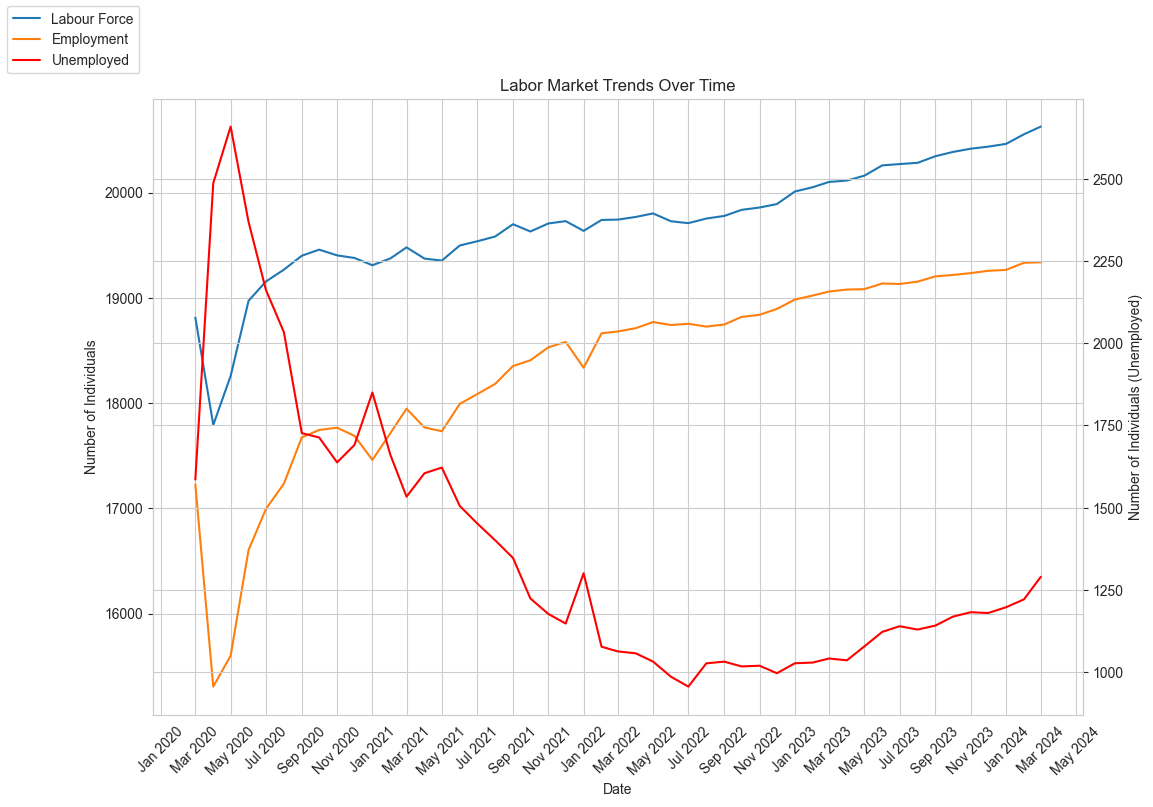

In [17]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot labour force and employment trends on primary y-axis
sns.lineplot(x='date', y='labour_force', data=labour_table, label='Labour Force', ax=ax1, legend=False)
sns.lineplot(x='date', y='employment', data=labour_table, label='Employment', ax=ax1, legend=False)

# Set labels and title for primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Individuals')
ax1.set_title('Labor Market Trends Over Time')

# Create a secondary y-axis for 'unemployed'
ax2 = ax1.twinx()

# Plot unemployed trends on secondary y-axis
sns.lineplot(x='date', y='unemployed', data=labour_table, label='Unemployed', color='red', ax=ax2, legend=False)
ax2.set_ylabel('Number of Individuals (Unemployed)')

# Set x-axis ticks every two months
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

# Add legend
fig.legend(loc="upper left")

# Show plot
plt.show()

In [18]:
labour_table.head()

,date,population,labour_force,employment,full_time,part_time,unemployed,unemployment_rate,participation_rate,employment_rate
0,2020-03-01,24530.1,18812.0,17227.0,14553.2,2673.7,1585.0,8.4,76.7,70.2
1,2020-04-01,24528.7,17791.8,15305.6,13138.1,2167.4,2486.2,14.0,72.5,62.4
2,2020-05-01,24526.2,18257.2,15599.1,13358.0,2241.1,2658.1,14.6,74.4,63.6
3,2020-06-01,24531.2,18971.6,16603.4,13898.2,2705.2,2368.2,12.5,77.3,67.7
4,2020-07-01,24536.1,19154.8,16993.2,13961.5,3031.7,2161.6,11.3,78.1,69.3


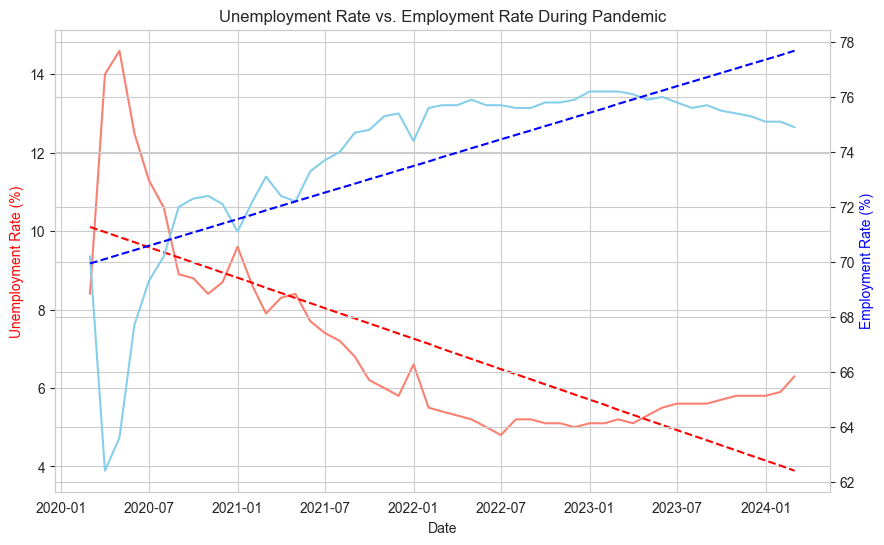

In [51]:
import numpy as np


labour_table['date'] = pd.to_datetime(labour_table['date'])

# Convert rate columns to numeric values
labour_table['unemployment_rate'] = pd.to_numeric(labour_table['unemployment_rate'])
labour_table['employment_rate'] = pd.to_numeric(labour_table['employment_rate'])

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot unemployment rate on the first y-axis (left)
sns.lineplot(data=labour_table, x='date', y='unemployment_rate', color='salmon', ax=ax1)
ax1.set_ylabel('Unemployment Rate (%)', color='red')

# Create a second y-axis (right) for employment rate
ax2 = ax1.twinx()
sns.lineplot(data=labour_table, x='date', y='employment_rate', color='skyblue', ax=ax2)
ax2.set_ylabel('Employment Rate (%)', color='blue')

# Fit trend lines
unemployment_trend = np.polyfit(labour_table.index, labour_table['unemployment_rate'], 1)
employment_trend = np.polyfit(labour_table.index, labour_table['employment_rate'], 1)

# Add trend lines to the plot
sns.lineplot(data=labour_table, x='date', y=np.polyval(unemployment_trend, labour_table.index), color='red', ax=ax1, linestyle='--')
sns.lineplot(data=labour_table, x='date', y=np.polyval(employment_trend, labour_table.index), color='blue', ax=ax2, linestyle='--')

# Set common labels and title
ax1.set_xlabel('Date')
plt.title('Unemployment Rate vs. Employment Rate During Pandemic')

plt.show()

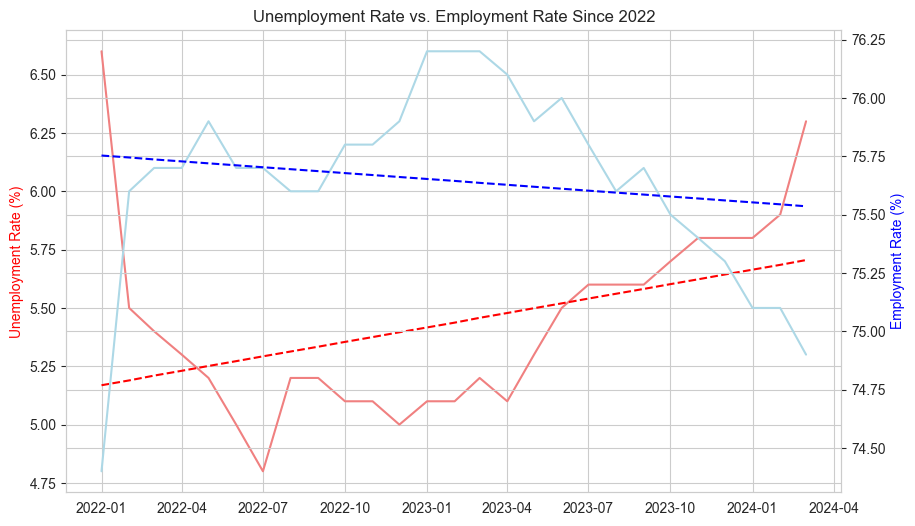

In [60]:
labour_table['date'] = pd.to_datetime(labour_table['date'])

# Filter data from January 1, 2022, to the latest date
start_date = '2022-01-01'
filtered_labour_table = labour_table.loc[labour_table['date'] >= start_date]

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot unemployment rate on the first y-axis (left)
sns.lineplot(data=filtered_labour_table, x='date', y='unemployment_rate', color='lightcoral', ax=ax1)
ax1.set_ylabel('Unemployment Rate (%)', color='red')

# Create a second y-axis (right) for employment rate
ax2 = ax1.twinx()
sns.lineplot(data=filtered_labour_table, x='date', y='employment_rate', color='lightblue', ax=ax2)
ax2.set_ylabel('Employment Rate (%)', color='blue')

# Fit trend lines
unemployment_trend = np.polyfit(filtered_labour_table.index, filtered_labour_table['unemployment_rate'], 1)
employment_trend = np.polyfit(filtered_labour_table.index, filtered_labour_table['employment_rate'], 1)

# Add trend lines to the plot with red and blue colors
sns.lineplot(data=filtered_labour_table, x='date', y=np.polyval(unemployment_trend, filtered_labour_table.index), ax=ax1, linestyle='--', color='red')
sns.lineplot(data=filtered_labour_table, x='date', y=np.polyval(employment_trend, filtered_labour_table.index), ax=ax2, linestyle='--', color='blue')

# Remove x-axis label
ax1.set_xlabel('')

# Set title
plt.title('Unemployment Rate vs. Employment Rate Since 2022')

plt.show()